In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Accessing Fusion Data 

# _tsmat_: Tore Supra / WEST
__PyWED__ (Python for West Experimental Data) is the Python package which allows accessing Tore Supra/WEST data. It aims to replace its Matlab TSlib equivalent, i.e. the famous `tsbase` and `tsmat` functions.

In order to use the PyWED package, you need to import it (note that the package is automatically imported when you launch Python from linux servers).

In [2]:
import pywed
# tsbase is available through pywed.tsbase().
# Or, in order to avoid typing "pywed." each time:
from pywed import *

The Python version of `tsbase` follows the same logic than the Matlab.

In Matlab, one would write:

    [a,b,c,d,e,f,...] = tsbase(arg1, arg2, ...);
    
While in Python, this would be:

    a,b,c,d,e,f,... = tsbase(arg1, arg2, ...)

Here is few examples.  

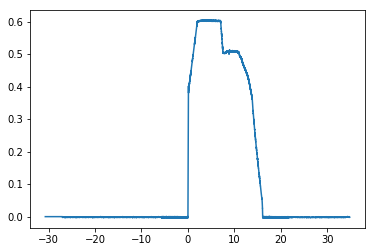

In [3]:
Ip,t,coords = tsbase(34567, 'SIPMES')

plot(t,Ip)

In [4]:
# Load the output into one single variable (A Python Tuple)
res = tsbase(34567, 'SIPMES')
print(res)

[array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.00170898],
       [ 0.        ],
       [-0.00195312]]), array([[-30.69519592],
       [-30.66242792],
       [-30.62965992],
       ...,
       [ 34.73635608],
       [ 34.76912408],
       [ 34.80189208]]), [[], 40, '01/06/2005', '18:18:04', 'mcs', 'MA', '', 'SIPMES', 'B']]


In [5]:
# tsbase
help(tsbase)

Help on function tsbase in module pywed.tsBase:

tsbase(*args, nargout=0)
    tsbase function is used to acces treated data from Tore Supra database.
    Syntax is:
            
            x1,t1,c1,x2,t2,r2,c2,... = pywed.tsbase(s1,s2,...,{nargout=0})
    
    The nargout argument is optionnal and can bu used to specify how many 
    returned values are expected. This optionnal argument is always given 
    as last argument of tsbase. For example to get 3 outputs you must type:
    
            a,b,c = pywed.tsbase(...,nargout=3)
            
    If the tsbase call returns more than 3 values, remain values will be 
    ignored. If the tsbase call returns less than 3 values, for example 2, 
    the excess argument will be 'None'. By default tsbase returns all the 
    output values are returned.
    
    * tsbase called with no argument returns the treatments list and 
    associated comments :
    
            tmtlst,tmtcmt = pywed.tsbase()
            
    * tsbase called only with a

In [6]:
#Load many signals by passing a list to tsbase:
# Plasma current
# Densite lineique f(t,R) pour R={1.97 2.135 2.3 2.465 2.63}
sig=['SIPMES ','Snmoy']
# in this case you need to know precisely how many outputs each signal generate
ip,t_ip,comments_ip,ne,t_ne,comments_ne = tsbase(34567,sig) 

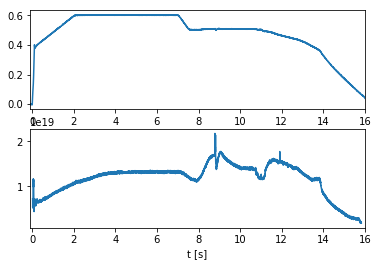

In [7]:
ax1=subplot(211)
plot(t_ip, ip)
xlabel(None)

ax2=subplot(212, sharex=ax1) # second subplot shares first subplot axis
plot(t_ne, ne)
xlabel('t [s]')

ax1=xlim(-0.1, +16) # rescale the x axis (both axis then)

The main difference with the Matlab version of tsbase concerns the output arguments. 

* In Python, either the user uses one variable in which all the results will be stored (a Python Tuple) or he uses as many as variables as the results. (while in Matlab, it can be any number of output variable)
* By default, `tsbase` returns either 3 or 4 results per signal: `signal`, `time`, `XXX`, `YYY`
* However, the Python `tsbase` function provides a way to define the number of desired output. Uses the optionnal argument `nargout=` to set the number of output variable you expect.

In [8]:
# Here we only want to get the 2 first output, 
# like usually done in Matlab
a,b = pywed.tsbase(34567,'SIPMES',nargout=2)

Bphi=1257.0 ; ti=[32.007248046875]


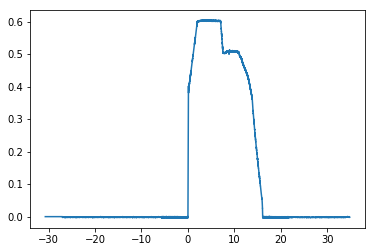

In [9]:
# also works with advanced signal requests 
Ip,t = pywed.tsmat(34567,'DPOLO-SIPMES')
Bphi = pywed.tsmat(34567,'EXP=T=S;GENERAL;ITOR') # note = instead of -
ti = pywed.tsmat(34567,'IGNITRON|1')

print('Bphi={} ; ti={}'.format(Bphi,ti))
plot(t, Ip)

1257.0


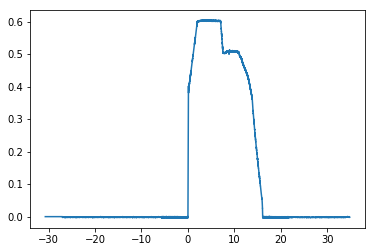

In [10]:
# Another example of advanced signal request
diag = ['DPOLO ','EXP-T-S ']
obj = ['SIPMES ','GENERAL ']
param = [' ','ITOR ']
mode = '-;'
Ip,t,p = pywed.tsmat(34567,diag,obj,param,mode)
print(p)
plot(t, Ip)

# MDSplus: WEST-Tore Supra/JET/EAST/etc.
[MDSplus](http://www.mdsplus.org/) is a set of software tools for data acquisition and storage and a methodology for management of complex scientific data. It is the most widely used system for data management in the magnetic fusion energy program. It is currently installed at over 30 sites spread over 4 continents.

In order to use MDSplus with Python, you need to import the `MDSplus` package:

In [11]:
# Import the MDSplus package as the 'mds' shorcut
import MDSplus as mds

ModuleNotFoundError: No module named 'MDSplus'

## Tore Supra/WEST

In [ ]:
# only works from identified (partenaires) places !
conx = mds.Connection('mdsplus.partenaires.cea.fr:8000') 

In [ ]:
# MDSplus request are based on TDI (tree data interface) commands.
# Since the WEST database is not a native MDSplus database, 
# in fact we use a wrapper which convert TDI expression into WEST database requests.
# This is possible using the '_sig=gettsbase(shot_nb, signame)' TDI expression.
y = conx.get('_sig=gettsbase(34567,"SIPMES")')
# the time base is obtained using 'dim_of(_sig)' 
t = conx.get('dim_of(_sig)')

plot(t,y)

## JET
JET data can be retrieved through the JET MDSplus wrapper. The behavior is similar than for WEST. 

The list of recommended signals in the JET database can be found here: http://users.jet.efda.org/openwiki/index.php/List_of_Recommended_Signals

In [ ]:
conx = mds.Connection('mdsplus.jet.efda.org') # only works from know places, such as inside 

In [ ]:
Shot = 80812
toffset=40 # plasma breakdown offset time

# Works with PPF signals
y = conx.get('_sigi=jet(\"ppf/magn/ipla\", {})'.format(Shot))
t = conx.get('dim_of(_sigi)')

bb=conx.get('_sigb=jet(\"ppf/pt5P/pen1\", {})'.format(Shot))
tbb = conx.get('dim_of(_sigb)')

# Also works with JPF signals
barb=conx.get('_sigbarb=jet(\"jpf/DF/T5-PEN2<PRS\", {})'.format(Shot))
tbarb= conx.get('dim_of(_sigbarb)')

In [ ]:
ax1=subplot(311)
plot(t-toffset, abs(y)/1e6, lw=2, color='r')
ylim(ymax=2.5) # it is possible to set only one parameter
ylabel('$I_p$ [MA]')
grid()
ax2=subplot(312, sharex=ax1)
plot(tbb-toffset, bb, lw=2)
ylabel("mBar")
grid()
ax3=subplot(313, sharex=ax1)
plot(tbarb-toffset, barb, lw=2, color='k')
ylabel('pression')
xlabel('t [s]')
grid()
xlim(0, 35)
# some tuning to remove the x ticks on the two first subplots
plt.setp( ax1.get_xticklabels(), visible=False)
plt.setp( ax2.get_xticklabels(), visible=False)

In [ ]:
# A 2D plot example with Li beam
ne = conx.get('_sig=jet("ppf/KY6/NER", 80812)') # Li beam ne measurement
ne_R = conx.get('dim_of(_sig,0)') # major radius in meter
ne_t = conx.get('dim_of(_sig,1)') # time in second

In [ ]:
# We check the shape of the output arrays
# note that np.shape(ne) or ne.shape is similar
print(ne.shape, shape(ne_R), shape(ne_t))

In [ ]:
toffset=40 # plasma breakdown offset time
RR, tt = meshgrid(ne_R, ne_t-toffset)
pcolormesh(RR, tt, ne.value, shading='gouraud') # pcolormesh is faster and recommanded vs pcolor (from matplotlib doc)
xlabel('Major Radius [m]', fontsize=14)
ylabel('Time [s]', fontsize=14)
axis([np.min(RR), np.max(RR), np.min(tt), np.max(tt)]) # zoom in the data region